EX1 Cycloid


<IPython.core.display.Javascript object>


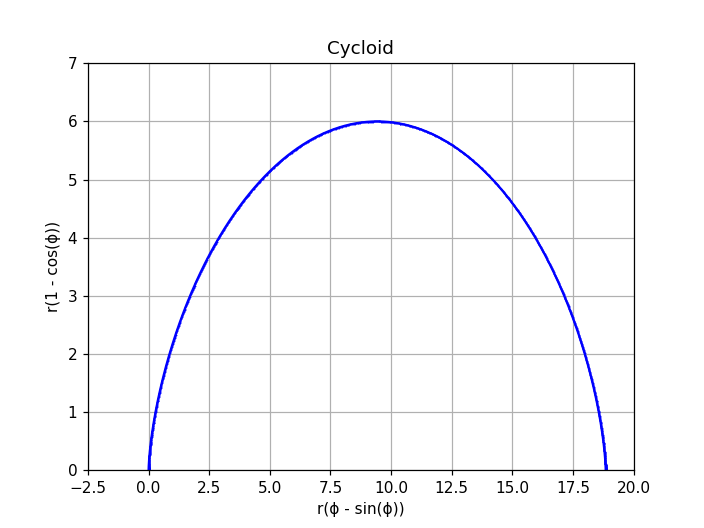

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D # <--- This is important for 3d plotting
from matplotlib import cm
import cartopy.crs as ccrs
import cartopy.feature as cfeature


%matplotlib notebook
print('EX1 Cycloid')
plt.figure()
plt.style.use("_classic_test_patch")
r = 3
phi = np.linspace(0, 2*np.pi, 1000)
x = r*(phi - np.sin(phi))
y = r*(1 - np.cos(phi))
plt.plot(x,y, color='b', marker='*', markersize=0.6)
plt.xlabel('r(ϕ - sin(ϕ))')
plt.ylabel('r(1 - cos(ϕ))')
plt.title('Cycloid')
plt.xlim([-2.5, 20])
plt.ylim([0, 7])
plt.grid()
plt.show()
print('\n')

EX2
Which plot seem to convey the most information?
The LogLog plot appears to convey the most information about the function.



<IPython.core.display.Javascript object>


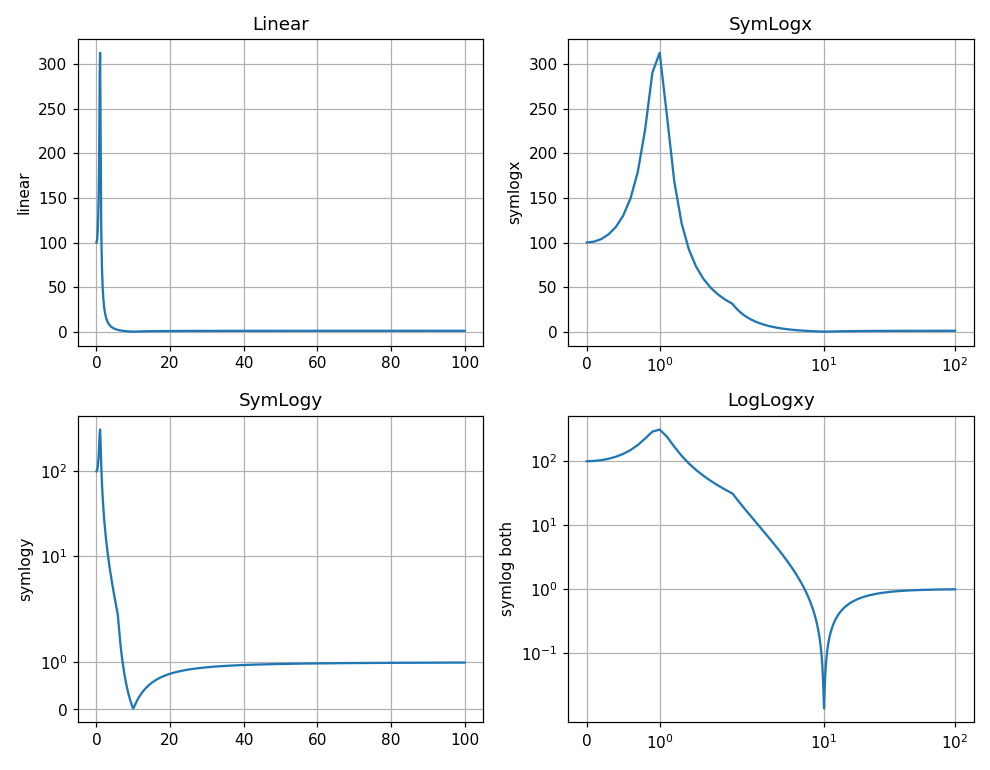

In [81]:
print('EX2')
print("""Which plot seem to convey the most information?""")
print("""The LogLog plot appears to convey the most information about the function.\n""")

x = np.linspace(0, 100, 1000)
y = np.sqrt(((100*(1 - 0.01*x**2))**2 + 0.02*x*x)/((1-x**2)**2 + 0.1*x**2))

fig, axs = plt.subplots(2, 2, figsize=(9, 7))  # constrained_layout=True
# linear
ax = axs[0, 0]
ax.plot(x, y)
ax.set_yscale('linear')
ax.set_ylabel('linear')
ax.set_title('Linear')
ax.grid(True)

# logx
ax = axs[0, 1]
ax.plot(x, y)
ax.set_xscale('symlog')
ax.set_ylabel('symlogx')
ax.set_title('SymLogx')
ax.grid()
ax.xaxis.grid(which='minor')  # minor grid on too

# logy
ax = axs[1, 0]
ax.plot(x, y)
ax.set_yscale('symlog')
ax.set_title('SymLogy')
ax.grid()
ax.set_ylabel('symlogy')

# logLog
ax = axs[1, 1]
ax.plot(x, y)
ax.set_xscale('symlog')
ax.set_yscale('symlog', linthresh=0.015)
ax.set_title('LogLogxy')
ax.grid()
ax.set_ylabel('symlog both')

fig.tight_layout()
plt.show()
print('\n')

EX3


<IPython.core.display.Javascript object>


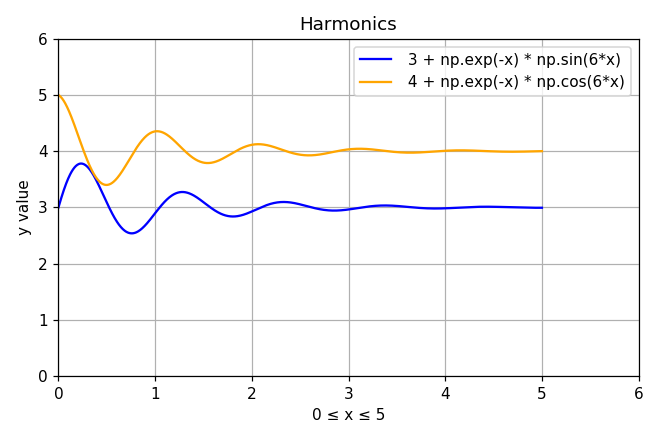

In [82]:
print('EX3')
x = np.linspace(0, 5, 1000)
y1 = 3 + np.exp(-x) * np.sin(6*x)
y2 = 4 + np.exp(-x) * np.cos(6*x)

fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(1, 1, 1)
line1 = ax.plot(x, y1, color='blue', label=" 3 + np.exp(-x) * np.sin(6*x)")
line2 = ax.plot(x, y2, color='orange', label=" 4 + np.exp(-x) * np.cos(6*x)")
ax.set_xlabel('0 ≤ x ≤ 5')
ax.set_ylabel('y value')
ax.set_ylim(0, 6)
ax.set_xlim(0, 6)
ax.set_title('Harmonics')
handles=[line1, line2]
ax.legend()
ax.grid()
fig.tight_layout()
plt.show()
print('\n')

EX4
Do you think that the np.random.randn fuction is a good approximatation of a normally distributed number?
Yes I do, I also think that np.random.normal is even better with more contol of the distribution.



<IPython.core.display.Javascript object>


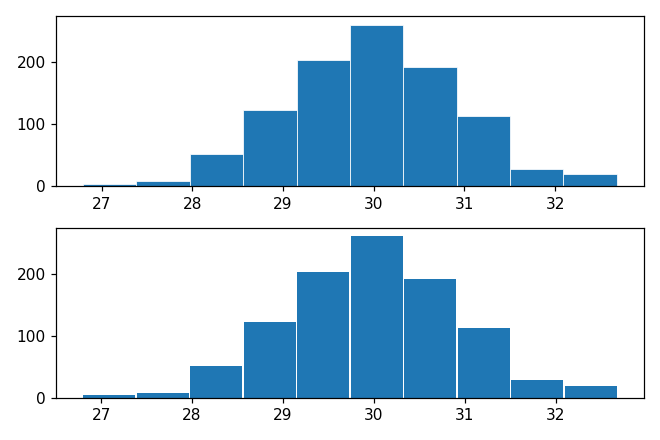

   Bin Data  Bin Mean Range
0       260         30.0320
1       203         29.4435
2       191         30.6205
3       122         28.8550
4       113         31.2090
5        52         28.2665
6        28         31.7970
7        19         32.3855
8         8         27.6780
9         4         27.0870 
Data that was used in both the histogram and bar plots.



In [83]:
print('EX4')
print("""Do you think that the np.random.randn fuction is a good approximatation of a normally distributed number?""")
print("""Yes I do, I also think that np.random.normal is even better with more contol of the distribution.\n""")
# make data
# The value in the numpy random seed saves the state of randomness. 
# If we call the seed function using value 1
# multiple times, the computer displays the same random numbers.
np.random.seed(10)  # to lock in the random numbers
x = np.random.normal(30, 1, 1000)


def hist_bar(x):
    data_4 = []
    data_ = []
    # Create a dataframe to of x so to creat bins for bar plot to match histogram.
    df_bins = pd.DataFrame({'Data':x})
    # Create the bins using pandas dataframe
    df_bins['Data2'] = pd.cut(df_bins['Data'], bins=10)
    # Create a array / list from bin data.
    data_bins = df_bins['Data2'].value_counts()
    # Create a array / list of the bins from the index.
    # IntervalIndex, dtype='interval[float64, right]'.
    data_bins.index = list(data_bins.index)
    # Convert the bin index to string and remove unnessary characters
    data_4 = [str(item) for item in data_bins.index]
    # item.translats will remove multiply characters.
    data_ = [item.translate({ ord(c): None for c in "(]" }) for item in data_4]
    # Created a data frame to split bin numbers and convert from str to numerical.
    # Created a new dataframe with the averages from the bins numbers
    df = pd.DataFrame(data_, columns=['bins'])
    df[['bins1', 'bins2']]= df['bins'].str.split(',', expand=True)
    df['bins1'] = pd.to_numeric(df['bins1'])
    df['bins2'] = pd.to_numeric(df['bins2'])
    df2 = df[["bins1","bins2"]].mean(axis=1)  # dataframe with mean values of each bin.
    # Rewrite data-4 to an array of of average (mean )values associated with the bin values.
    data_4 = np.array(df2)
    # An array crated from the bin data.
    data3 = np.array(pd.Series(data_bins))
    return data3, data_4


bin_val, bin_ave = hist_bar(x)
# plot:
fig, (ax0, ax1) = plt.subplots(2,1, figsize=(6, 4))
# Histrogram plot
ax0.hist(x, bins=10, linewidth=0.5, edgecolor="white")
# bar plot
ax1.bar(bin_ave, bin_val, width=0.57)
# Fit the display
fig.tight_layout()
plt.show()
data_bar = list(zip(bin_val,bin_ave))
df_bar_data = pd.DataFrame(data_bar, columns=['Bin Data', 'Bin Mean Range'])
print(df_bar_data, '\nData that was used in both the histogram and bar plots.\n')

EX5


<IPython.core.display.Javascript object>


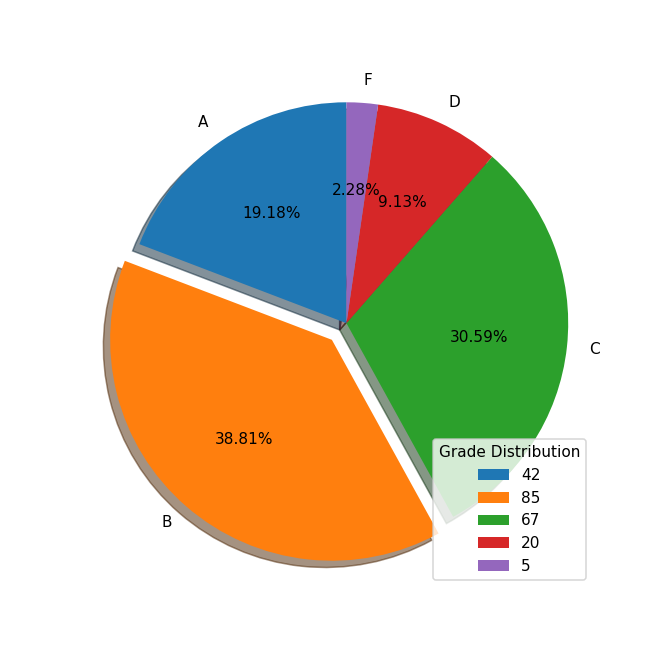

In [84]:
print('EX5')
labels = 'A', 'B', 'C', 'D', 'F'
grad_dist = [42, 85, 67, 20, 5]
explode = (0, 0.1, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(6, 6))
ax1.pie(grad_dist, explode=explode, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=90)
ax1.title
ax1.legend(grad_dist,
          title="Grade Distribution",
          loc="lower right")
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
fig.tight_layout()
plt.show()
print('\n')

EX6


<IPython.core.display.Javascript object>


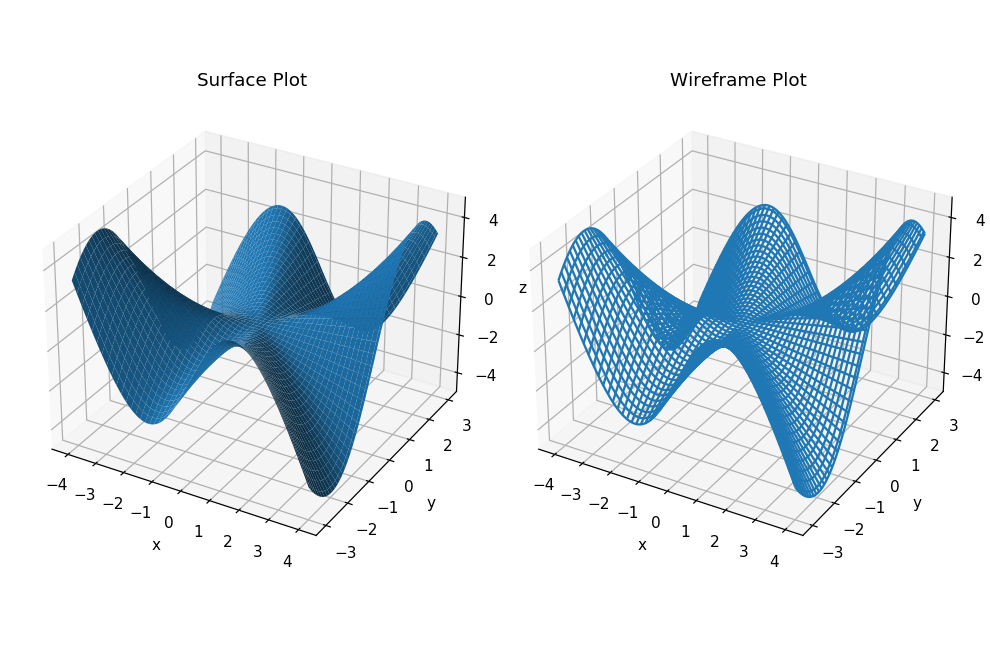

In [85]:
print('EX6')
x = np.linspace(-4, 4, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = (X*Y*(X**2 - Y**2))/(X**2 + Y**2)
fig = plt.figure(figsize=(9, 6))
# figure 1 plot wireframe 3D
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot_wireframe(X, Y, Z)
ax.set_title('Wireframe Plot')
ax.set(xlabel='x', ylabel='y', zlabel='z')
# figure 1 plot surface 3D
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(X, Y, Z)
ax.set_title('Surface Plot')
ax.set(xlabel='x', ylabel='y', zlabel='z')
fig.tight_layout()
plt.show()
print('\n')

EX7
 
The basic approach is to sweep out a circle, and put n equally spaced points on it. 
These will be the points of our polygon, starting at the 12 'o' clock position.
The first thing to do is work out the angle (in radians) of each wedge from the 
center outwards. The total number of radians in a circle is 2 pi, so our value 
is 2 pi / n per segment. After that a bit of basic trig gives us our points 
(https://en.wikipedia.org/wiki/Trigonometry#Extending_the_definitions).
At this point we scale by our desired radius, and have the opportunity to offset
the rotation by a fixed amount too.
After that we translate the values by a certain amount, because you probably want
your polygon in the center of the screen, not in the corner.
right triangle cos() = x/r and sin() = y/r where r is the hypotenuse of right triangle


<IPython.core.display.Javascript object>


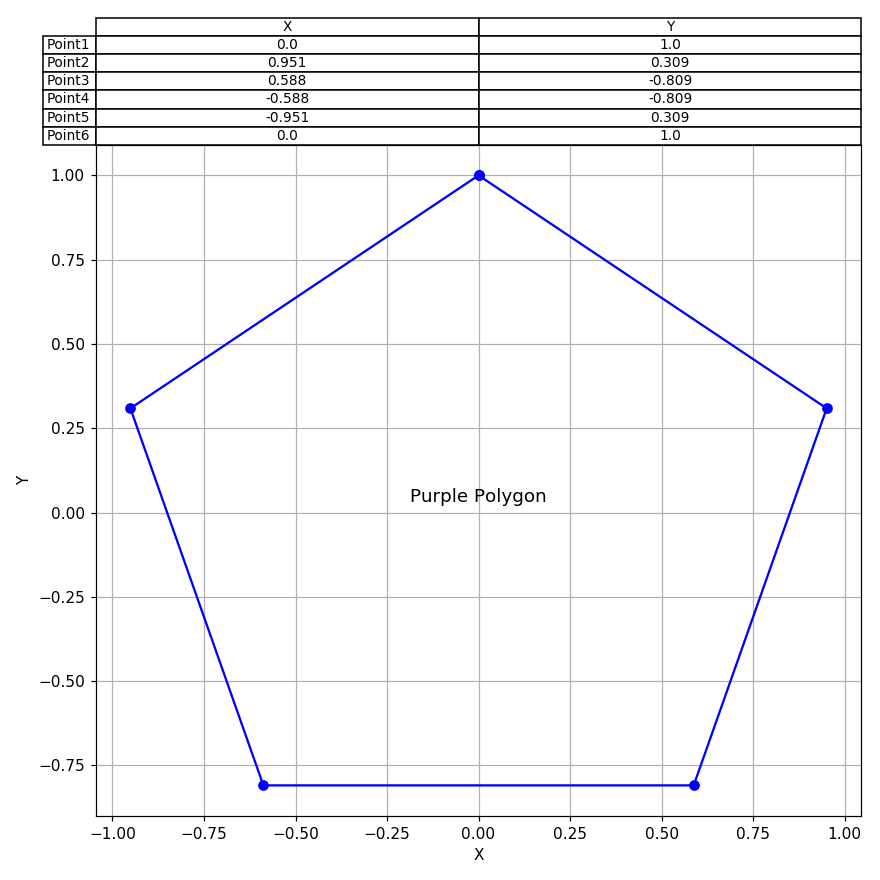

In [86]:
print('EX7')
print(""" 
The basic approach is to sweep out a circle, and put n equally spaced points on it. 
These will be the points of our polygon, starting at the 12 'o' clock position.
The first thing to do is work out the angle (in radians) of each wedge from the 
center outwards. The total number of radians in a circle is 2 pi, so our value 
is 2 pi / n per segment. After that a bit of basic trig gives us our points 
(https://en.wikipedia.org/wiki/Trigonometry#Extending_the_definitions).
At this point we scale by our desired radius, and have the opportunity to offset
the rotation by a fixed amount too.
After that we translate the values by a certain amount, because you probably want
your polygon in the center of the screen, not in the corner.
right triangle cos() = x/r and sin() = y/r where r is the hypotenuse of right triangle""")


def polygon(sides, radius=1, rotation=0, translation=None):
    """sides are the number of sides to the polygon, 
    radius for the center,
    rotation determines rotation around center in rads, 
    translation is where it will be centered"""
    one_segment = np.pi * 2 / sides

    points = [
        (np.sin(one_segment * i + rotation) * radius,
         np.cos(one_segment * i + rotation) * radius)
        for i in range(sides)]

    if translation:
        points = list([[sum(pair) for pair in zip(point, translation)] for point in points])
    return points


points = polygon(5, 1, 0)
df_pol = pd.DataFrame(points)
# Add back to the botom of the data frame the first point
# to complete the 5th line. You can draw four lines from 5 points.
first = list(df_pol.iloc[0:1, 0:2].apply(float))#
df_pol.loc[len(df_pol.index)] = first
# print(df_pol)
x = df_pol[0]
y = df_pol[1]
# Plot points

fig = plt.figure(figsize=(8, 8))
plt.style.use("_classic_test_patch")
plt.plot(x,y, '-bo')
plt.xlabel('X')
plt.ylabel('Y')

plt.title('Purple Polygon', y=0.5, pad=-14)
plt.grid()
column_headers = ('X', 'Y')
row_headers = ('Point1', 'Point2', 'Point3', 'Point4', 'Point5', 'Point6')
nums = np.array(df_pol.iloc[:, :])
nums = np.round(nums, 3)
the_table = plt.table(cellText=nums,
                      cellLoc='center',
                      rowLabels=row_headers,
                      rowLoc='right',
                      colWidths=None,
                      colLabels=column_headers,
                      gid=None,
                      loc='top')
the_table.auto_set_font_size(False)
the_table.set_fontsize(9)
fig.tight_layout()
plt.show()
print('\n')

EX8


<IPython.core.display.Javascript object>


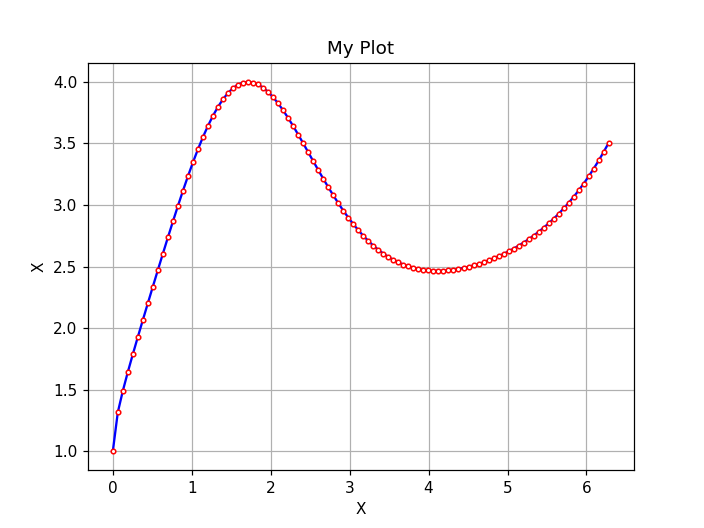

In [87]:
print('EX8')


def my_fun_plotter(f, x):
    x = x
    y = f
    plt.figure()
    plt.style.use("_classic_test_patch")
    plt.plot(x,y, 'o-b', ms=3, mfc='w', mec='r')
    plt.xlabel('X')
    plt.ylabel('X')
    plt.title('My Plot')
    plt.grid()
    plt.show()
    return()


x = np.linspace(0, 2*np.pi, 100)
fx = lambda x: np.sqrt(x) + np.exp(np.sin(x))
y = fx(x)
my_fun_plotter(y, x)
print('\n')

EX9


<IPython.core.display.Javascript object>


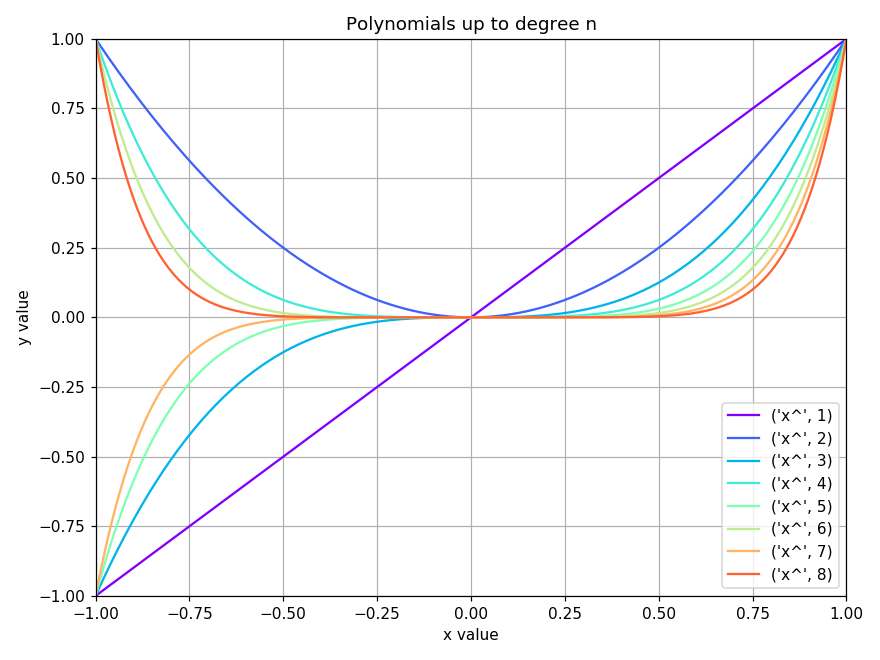

In [88]:
print('EX9')


def my_ploy_plotter(n, x):
    # pk(x) = x^k for k = 1....n
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot()
    label_lst = []

    def get_cmap(n, name='rainbow'):
        '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
        RGB color; the keyword argument name must be a standard mpl colormap name.'''
        return plt.cm.get_cmap(name, n)

    cmap = get_cmap(n+1)
    for i in range(n):
        y = x**(i+1)
        label_lst.append(("x^", (i+1)))
        line = ax.plot(x, y, color=cmap(i), label=label_lst[i])
    
    ax.set_xlabel('x value')
    ax.set_ylabel('y value')
    ax.set_ylim(-1.0, 1.0)
    ax.set_xlim(-1.0, 1.0)
    ax.set_title('Polynomials up to degree n')
    ax.legend()
    ax.grid()
    fig.tight_layout()
    plt.show()
    return()


my_ploy_plotter(8, np.linspace(-1, 1, 200))
print('\n')

EX10


<IPython.core.display.Javascript object>


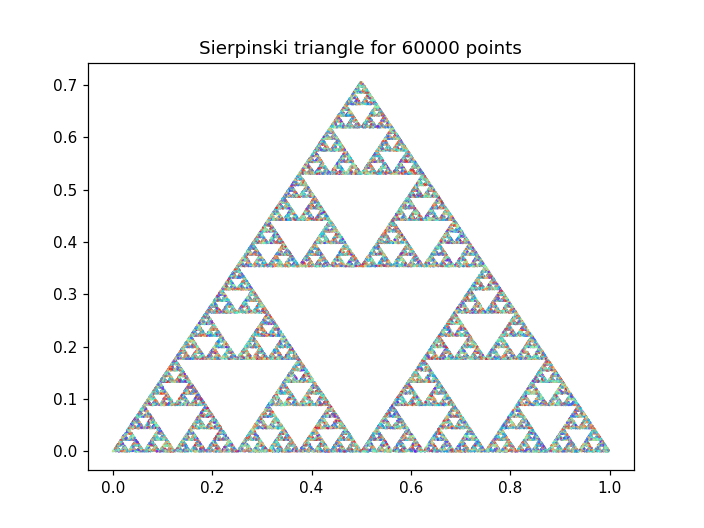

In [89]:
print('EX10')
import multiprocessing as mp

def my_sierpinski(n):
    P_coordinates = [[0.0, 0.0], [0.5, np.sqrt(2)/2], [1.0, 0.0]]
    x_coordinates = [P_coordinates[0][0]]
    y_coordinates = [P_coordinates[0][1]]
    # generate random colors for all n points
    colors = np.random.rand(n+1)
    for i in range(n):
        r =  np.random.randint(3)         # same as random.randrange(3)
        # The P_coordinates[r][0] is 1/3 or 33% where r is 1,2,3
        x_coordinates.append((x_coordinates[-1] + P_coordinates[r][0]) / 2)
        y_coordinates.append((y_coordinates[-1] + P_coordinates[r][1]) / 2)
    fig, ax = plt.subplots()
    # plot points
    ax.scatter(x_coordinates, y_coordinates, s=0.1, c=colors, cmap='rainbow', marker='o')
    # set title
    ax.set(title=f'Sierpinski triangle for {n} points')
    plt.show()
    return()


points = 60000
my_sierpinski(points)
# Code copied from niciki on github and modified slightly for the problem
# https://github.com/niciki/Sierpinski_fractals/blob/main/Sierpinski_triangle_mathplotlib.py
print('\n')

<IPython.core.display.Javascript object>


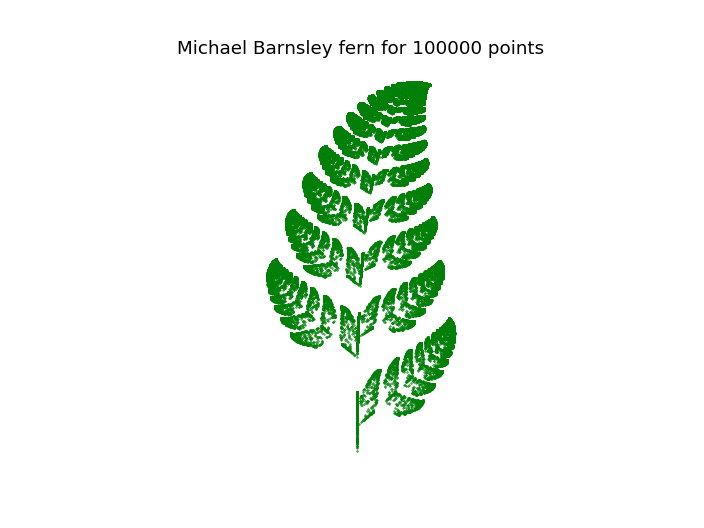

Copied and modified to fit the problem from https://www.geeksforgeeks.org/barnsley-fern-in-python/

Barnsley fern is a fractal shape created by mathematician Michael Barnsley.

The geometric features of this fractal resemble a natural fern and hence it gets its name.

Barnsley fern is created by iterating over a large number of times on four mathematical

equations, introduced by Barnsley, known as Iterated Function System (IFS).


The transformation Barnsley used had the formula :

f(x,y) [[a, b] [c, d]] [x, y] = [e, f]

where, the letters had following value :


  a        b    c    d       e    f     p     PART

  0        0    0    0.16    0    0   0.01    Stem

  0.85   0.04  0.04  0.85    0  1.60  0.85    Small Leaflet

  0.20  -0.26  0.23  0.22    0  1.60  0.07    Large Leaflet(Left)

 -0.15  0.28  0.26  0.24    0  0.44  0.07    Large Leaflet(Right)

 and “p” is the probability.


Thus the four equations are:

  f_1 : x_{n+1} = 0,                       y_{n+1} =  0.16 y{n}

  f_

In [138]:
print('EX11')

def my_fern(n):
    # initializing the list
    x = []
    y = []

    # setting first element to 0
    x.append(0)
    y.append(0)
    current = 0

    for i in range(1, n):
        # the x and y coordinates of the equations
        # are appended in the lists respectively.
        z = np.random.randint(1, 100)
        # for the probability 0.01
        if z == 1:
            x.append(0)
            y.append(0.16*(y[current]))

        # for the probability 0.85	
        if z >= 2 and z <= 86:
            x.append( 0.85*(x[current]) + 0.03*(y[current]))
            y.append(-0.04*(x[current]) + 0.75*(y[current]) + 1.6)

        # for the probability 0.07	
        if z >= 87 and z <= 93:
            x.append(0.20*(x[current]) - 0.26*(y[current]))
            y.append(0.23*(x[current]) + 0.22*(y[current]) + 1.6)

        # for the probability 0.07	
        if z >= 94 and z <= 100:
            x.append(-0.15*(x[current]) + 0.28*(y[current]))
            y.append( 0.26*(x[current]) + 0.24*(y[current]) + 0.44)

        current = current + 1
    fig, ax = plt.subplots()
    ax.scatter(x, y, s=0.2, edgecolor ='green')
    ax.set(title=f'Michael Barnsley fern for {n} points')
    plt.axis('equal')
    plt.axis('off')
    plt.show()
    return

my_fern(100000)
print('Copied and modified to fit the problem from'
      ' https://www.geeksforgeeks.org/barnsley-fern-in-python/')
print('')
print("""Barnsley fern is a fractal shape created by mathematician Michael Barnsley.\n
The geometric features of this fractal resemble a natural fern and hence it gets its name.\n
Barnsley fern is created by iterating over a large number of times on four mathematical\n
equations, introduced by Barnsley, known as Iterated Function System (IFS).\n

The transformation Barnsley used had the formula :\n
f(x,y) [[a, b] [c, d]] [x, y] = [e, f]\n
where, the letters had following value :\n

  a        b    c    d       e    f     p     PART\n
  0        0    0    0.16    0    0   0.01    Stem\n
  0.85   0.04  0.04  0.85    0  1.60  0.85    Small Leaflet\n
  0.20  -0.26  0.23  0.22    0  1.60  0.07    Large Leaflet(Left)\n
 -0.15  0.28  0.26  0.24    0  0.44  0.07    Large Leaflet(Right)\n
 and “p” is the probability.\n

Thus the four equations are:\n
  f_1 : x_{n+1} = 0,                       y_{n+1} =  0.16 y{n}\n
  f_2 : x_{n+1} =  0.85 x{n} + 0.04 y{n},  y_{n+1} = -0.04 x{n} + 0.85 y{n} + 1.6\n
  f_3 : x_{n+1} =  0.20 x{n} - 0.26 y{n},  y_{n+1} =  0.23 x{n} + 0.22 y{n} + 1.6\n
  f_4 : x_{n+1} = -0.15 x{n} + 0.28 y{n}   y_{n+1} =  0.26 x{n} + 0.24 y{n} + 0.44\n
 With the help of above equations, the fern is created.\n
 Note: The whole output depends upon the coefficients of the equations.\n
 One experiment might be to change the coefficients and get a new pattern every time.\n""")

EX12


<IPython.core.display.Javascript object>


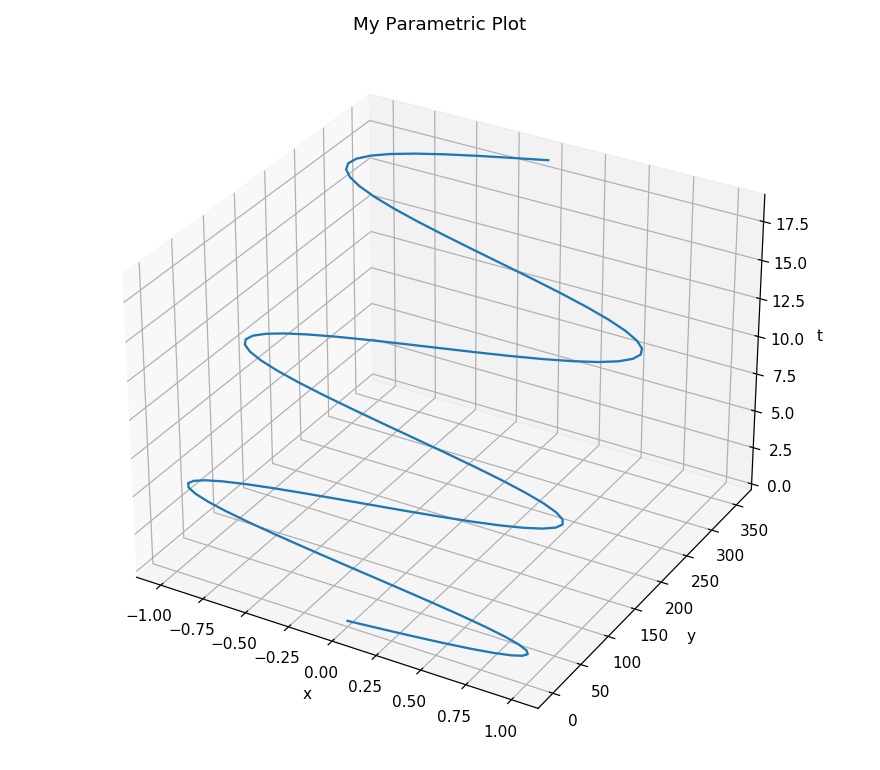

In [22]:
print('EX12')


def my_parametric_plotter(x, y, t):
    x = x(t)
    y = y(t)
    fig = plt.figure(figsize=(8, 7))
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax.plot3D(x, y, t)
    ax.set_title('My Parametric Plot')
    ax.set(xlabel='x', ylabel='y', zlabel='t')
    fig.tight_layout()
    plt.show()
    return

t = np.linspace(0, 6*np.pi, 100)
f = lambda t: np.sin(t)
g = lambda t: t**2

my_parametric_plotter(f, g, t)
print('\n')

EX13
Enter 1 for Surface Plot or 2 for Contour Plot : 2
Contour Plot


<IPython.core.display.Javascript object>


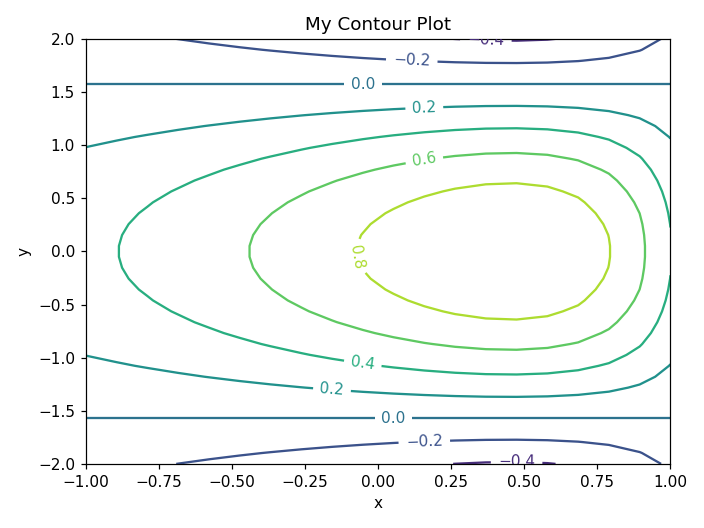

In [3]:
print('EX13')

def my_suface_plotter(f, x, y, option):
    X, Y = np.meshgrid(x, y) 
    Z = f(X, Y)
    # print(X, type(X), '\n\n', Y, type(Y), '\n\n', Z)
    if option == 'surface':
        fig = plt.figure(figsize=(8, 7))
        ax = fig.add_subplot(1, 1, 1, projection='3d')
        surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                               linewidth=0, antialiased=False)
        ax.set_title('My Surface Plot')
        ax.set(xlabel='x', ylabel='y', zlabel='t')
        fig.tight_layout()
        plt.show()
    elif option == 'contour':
        fig, ax = plt.subplots()
        cs = ax.contour(X, Y, Z)
        ax.clabel(cs, inline=True, fontsize=10)
        ax.set_title('My Contour Plot')
        ax.set(xlabel='x', ylabel='y')
        fig.tight_layout()
        plt.show()
    else:
        print("The option should be 'surface' or 'contour'")
    return

inp = 0
valid_inputs = (1, 2)
plot = {1: 'surface', 2:'contour'}
while inp not in valid_inputs:
    inp = int(input("Enter 1 for Surface Plot or 2 for Contour Plot : "))
    if inp not in valid_inputs:
        print("You must type 1 for Surface Plot or 2 for Contour Plot.")
opt = plot[inp]
print('Surface Plot' if plot[inp] == 'surface' else 'Contour Plot')

x = np.linspace(-1, 1, 20)
y = np.linspace(-2, 2, 40)
f = lambda x, y: np.cos(y)*np.sin(np.exp(x))
#opt = 'surface'
my_suface_plotter(f, x, y, opt)

In [133]:
print('EX14')
span_L = []
span_Q = []
Q= []
Delta_T = 100
T_cond = (207 /100)
Area = 1

for lenght in range (100):
    span_L.append(float(lenght))

# span_L = np.linspace(1.0, 101.0, 100)'This is the correct way'

print(len(span_L))

for span_L in range (1,101): 
    Q = (T_cond*Area*Delta_T/span_L) 
    span_Q.append(float(Q))

# span_Q = (T_cond*Area*Delta_T/span_L)'This is the correct way'

print(len(span_Q)) # same length as above

print("""Even though they both have the same size the reference here resets the 
span_L creating issues with the plot. It resets span_L to integer of a 
single value. you could set a differnt value to plot based on a different variable.
Issue is here 'for span_L in range (1,101)'and here 'plt.plot(span_L,span_Q)'.
If you print span_L after the last for loop span_L is reported as a single 
integer of 100 and not a list of 100 values.
I picked this one due to the not so visible error. """)
print('Source: https://www.holadevs.com/pregunta/83506/valueerror-x-and-y-must-have-same-first-dimension\n')

#fig = plt.figure()
plt.plot(span_L,span_Q) 
plt.title("Heat transfer for different thichkness values in an Al plate") 
plt.xlabel("Lenght in cm")
plt.ylabel("Heat transfer in Watts [W]") 
plt.show()
print('Source: https://www.holadevs.com/pregunta/83506/valueerror-x-and-y-must-have-same-first-dimension\n')

EX14
100
100
Even though they both have the same size the reference here resets the 
span_L creating issues with the plot. It resets span_L to integer of a 
single value. you could set a differnt value to plot based on a different variable.
Issue is here 'for span_L in range (1,101)'and here 'plt.plot(span_L,span_Q)'.
If you print span_L after the last for loop span_L is reported as a single 
integer of 100 and not a list of 100 values.
I picked this one due to the not so visible error. 
Source: https://www.holadevs.com/pregunta/83506/valueerror-x-and-y-must-have-same-first-dimension



ValueError: x and y must have same first dimension, but have shapes (1,) and (100,)

EX15


<IPython.core.display.Javascript object>


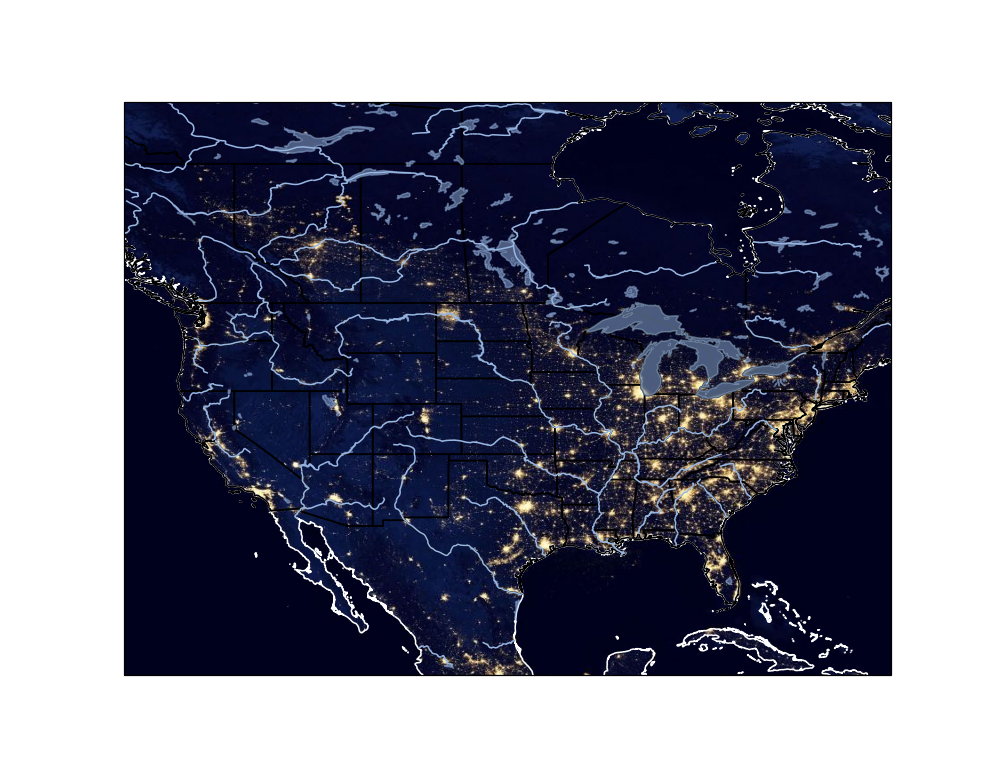

In [6]:
import cartopy.feature as cfeature
print('EX15')


def plot_city_lights():
    # Define resource for the NASA night-time illumination data.
    base_uri = 'https://map1c.vis.earthdata.nasa.gov/wmts-geo/wmts.cgi'
    layer_name = 'VIIRS_CityLights_2012'

    # Create a Cartopy crs for plain and rotated lat-lon projections.
    plain_crs = ccrs.PlateCarree()
    rotated_crs = ccrs.RotatedPole(pole_longitude=120.0, pole_latitude=45.0)

    fig = plt.figure(figsize=(9, 7))

    # Plot WMTS data in a specific region, over a plain lat-lon map.
    ax = fig.add_subplot(1, 1, 1, projection=plain_crs)
    ax.set_extent([-128.75583, -68.01197, 19.50139, 64.85694], crs=ccrs.PlateCarree())
    ax.coastlines(resolution='10m', color='white')
    ax.add_feature(cfeature.STATES, linestyle='-')
    ax.add_feature(cfeature.BORDERS)
    ax.add_feature(cfeature.LAKES, alpha=0.5)
    ax.add_feature(cfeature.RIVERS)
    #ax.gridlines(color='lightgrey', linestyle='-')
    # Add WMTS imaging.
    ax.add_wmts(base_uri, layer_name=layer_name)
    plt.show()
    return


if __name__ == '__main__':
    plot_city_lights()